In [1]:
import pandas as pd

In [2]:
url = 'https://drive.google.com/file/d/1tn163MghO8GMWq-noSYumie8eyPQ8uYG/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.drop(axis=1,inplace=True,columns='Loan_ID')
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


In [10]:
label = data.pop('Loan_Status')

In [11]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data, label)

X_resampled.reset_index()
y_resampled.reset_index()
# Combine resampled features and target into a new DataFrame
resampled_data = pd.concat([X_resampled, y_resampled], axis=1)

In [12]:
resampled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             664 non-null    int64  
 1   Married            664 non-null    int64  
 2   Dependents         664 non-null    int64  
 3   Education          664 non-null    int64  
 4   Self_Employed      664 non-null    int64  
 5   ApplicantIncome    664 non-null    int64  
 6   CoapplicantIncome  664 non-null    float64
 7   LoanAmount         664 non-null    float64
 8   Loan_Amount_Term   664 non-null    float64
 9   Credit_History     664 non-null    float64
 10  Property_Area      664 non-null    int64  
 11  Loan_Status        664 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 62.4 KB


In [13]:
# Check the new class distribution
print(resampled_data['Loan_Status'].value_counts())

Loan_Status
0    332
1    332
Name: count, dtype: int64


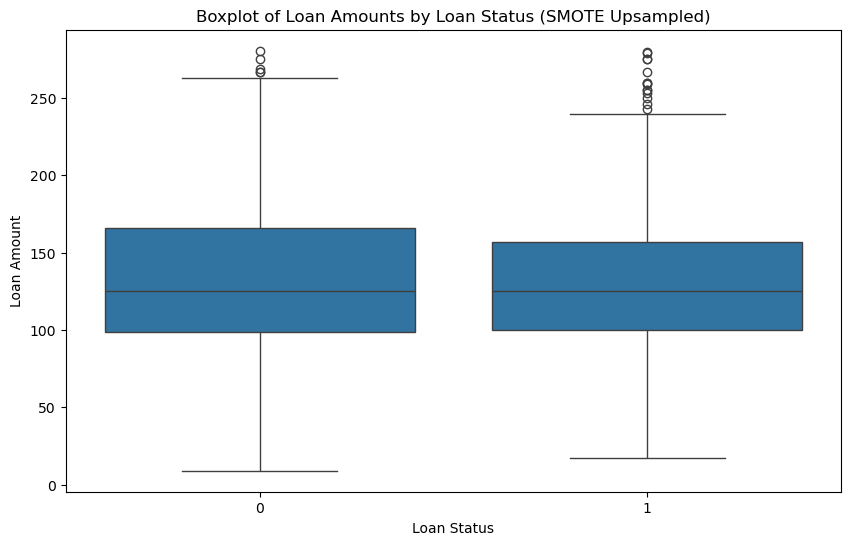

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = resampled_data['LoanAmount'].quantile(0.25)
Q3 = resampled_data['LoanAmount'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
resampled_filtered = resampled_data[(resampled_data['LoanAmount'] >= lower_bound) & (resampled_data['LoanAmount'] <= upper_bound)]

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=resampled_filtered)
plt.title('Boxplot of Loan Amounts by Loan Status (SMOTE Upsampled)')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

           Gender     Married  Dependents   Education  Self_Employed  \
count  480.000000  480.000000  480.000000  480.000000     480.000000   
mean     0.820833    0.647917    0.777083    0.202083       0.137500   
std      0.383892    0.478118    1.020815    0.401973       0.344734   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    2.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.0000

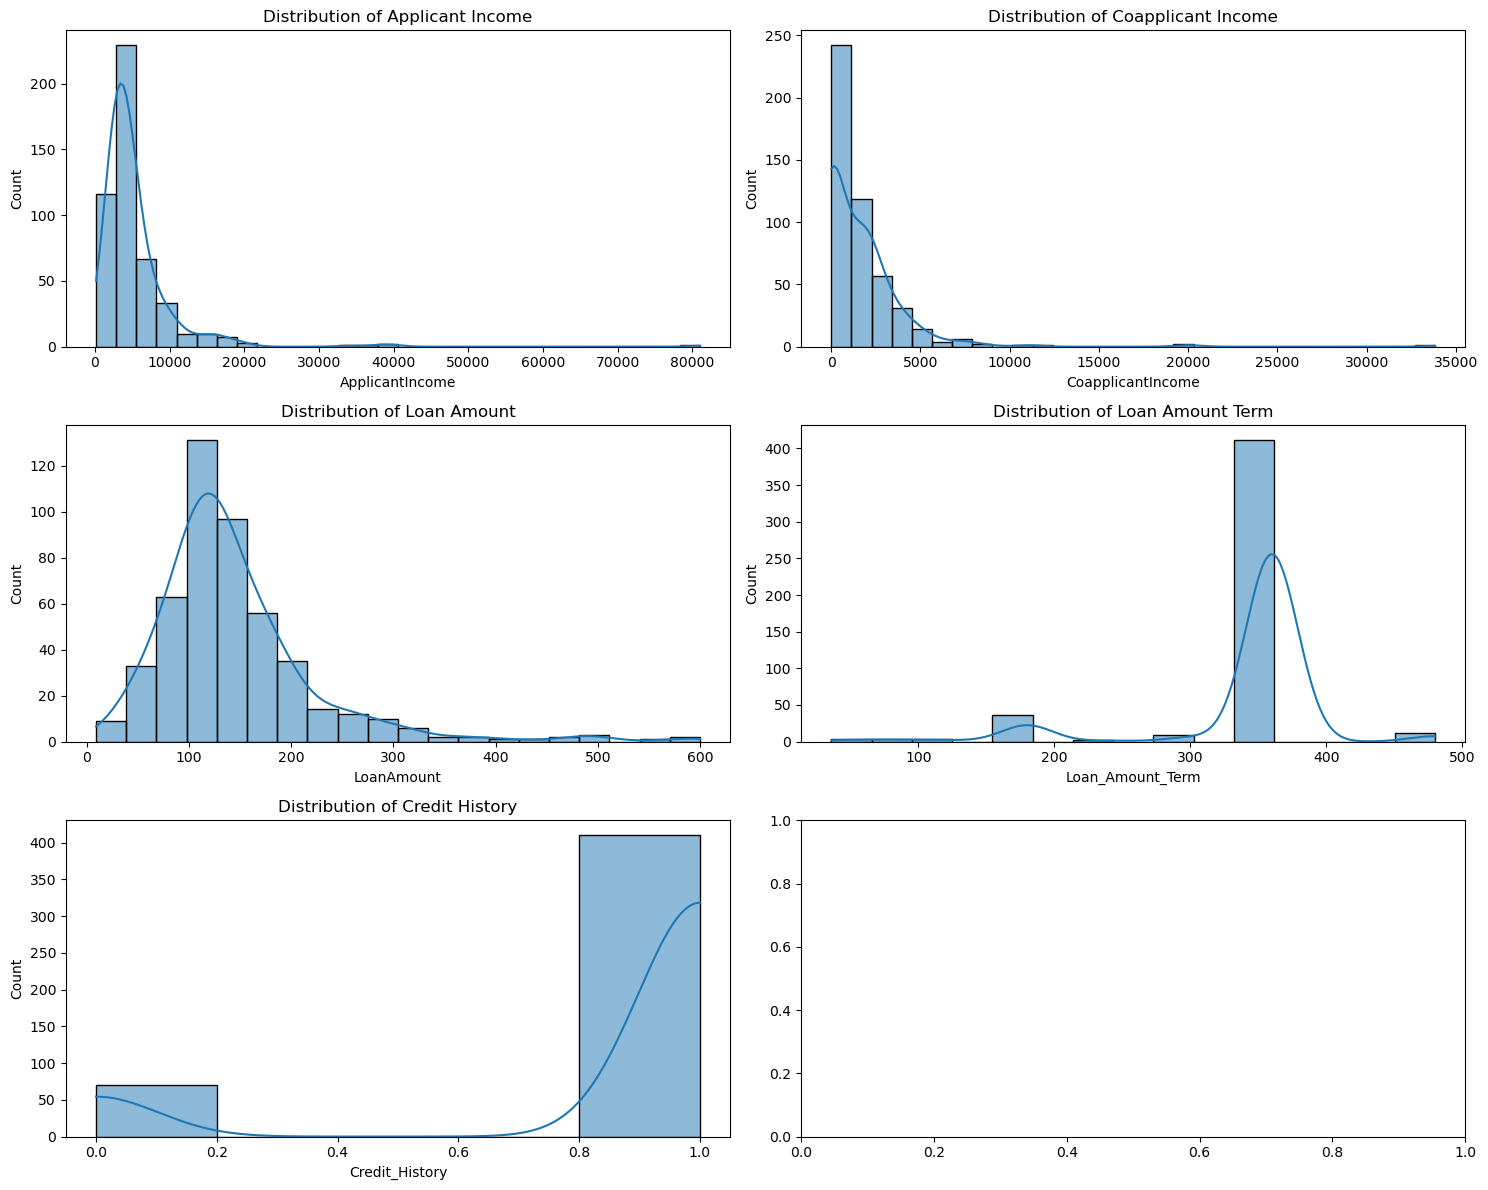

In [15]:


# Descriptive statistics
print(data.describe())

# Plot histograms for numerical features
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

sns.histplot(data['ApplicantIncome'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Applicant Income')

sns.histplot(data['CoapplicantIncome'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Coapplicant Income')

sns.histplot(data['LoanAmount'], bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Loan Amount')

sns.histplot(data['Loan_Amount_Term'], bins=15, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Loan Amount Term')

sns.histplot(data['Credit_History'], bins=5, kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Distribution of Credit History')

# # Plot Loan Status distribution
# sns.countplot(data['Loan_Status'], ax=axs[2, 1])
# axs[2, 1].set_title('Distribution of Loan Status')

plt.tight_layout()
plt.show()


In [16]:
label = resampled_data.pop('Loan_Status')
data = resampled_data

In [17]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(data, label, test_size=0.2, random_state=2)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
# tree = DecisionTreeClassifier()

# parameter = {
#     "random_state": [42],
#     "criterion": ["entropy"],
#     "max_depth": range(1,10),
#     "min_samples_split": range(2,10),
#     "min_samples_leaf": range(1,5)
# }

# from sklearn.model_selection import GridSearchCV
# GS = GridSearchCV(estimator = tree,
#                     param_grid = parameter,
#                     scoring = "accuracy",
#                     verbose = 3)

# GS.fit(data_train, label_train)

In [20]:
# print(GS.best_params_)

In [21]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=42)
tree.fit(data_train, label_train)
tree_pred = tree.predict(data_test)

In [22]:
forest = RandomForestClassifier(criterion='entropy', max_depth=1, min_samples_leaf=1, min_samples_split=2, random_state=42)
forest.fit(data_train, label_train)
forest_pred = forest.predict(data_test)

In [23]:
xgboost = GradientBoostingClassifier()
xgboost.fit(data_train, label_train)
xgboost_pred = xgboost.predict(data_test)

In [24]:
from sklearn.metrics import classification_report
report_1 = classification_report(label_test, tree_pred)
print('Hasil Model Decision Tree')
print(report_1)

Hasil Model Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.54      0.70        70
           1       0.66      0.98      0.79        63

    accuracy                           0.75       133
   macro avg       0.82      0.76      0.74       133
weighted avg       0.83      0.75      0.74       133



In [25]:
from sklearn.metrics import classification_report
report_2 = classification_report(label_test, forest_pred)
print('Hasil Model Random Forest')
print(report_2)

Hasil Model Random Forest
              precision    recall  f1-score   support

           0       0.98      0.61      0.75        70
           1       0.70      0.98      0.82        63

    accuracy                           0.79       133
   macro avg       0.84      0.80      0.79       133
weighted avg       0.84      0.79      0.78       133



In [26]:
from sklearn.metrics import classification_report
report_3 = classification_report(label_test, xgboost_pred)
print('Hasil Model XGBoost')
print(report_3)

Hasil Model XGBoost
              precision    recall  f1-score   support

           0       0.86      0.70      0.77        70
           1       0.72      0.87      0.79        63

    accuracy                           0.78       133
   macro avg       0.79      0.79      0.78       133
weighted avg       0.80      0.78      0.78       133

